In [22]:
import nltk
import urllib.request
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In this notebook, we use the NLTK Python library to parse through a website's privacy policy, clean it up, and then determine the overall topic of the text.

First, we enter in the URL of the policy and print the raw HTML output.

In [39]:
response =  urllib.request.urlopen('https://www.apple.com/legal/privacy/en-ww/')
html = response.read()
print(html)

b'\n\n<!DOCTYPE html>\n\n\t<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en-US" lang="en-US" prefix="og: http://ogp.me/ns#" class="no-js">\n\t\n<head>\n\t\n    \n\t\n\t\t\n\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge" />\n\n\t\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n<meta charset="utf-8" />\n<link rel="canonical" href="https://www.apple.com/legal/privacy/en-ww/" />\n\n\n\t\n\t<link rel="alternate" href="https://www.apple.com/au/legal/privacy/en-ww/" hreflang="en-AU" /><link rel="alternate" href="https://www.apple.com/ca/legal/privacy/en-ww/" hreflang="en-CA" /><link rel="alternate" href="https://www.apple.com/ie/legal/privacy/en-ww/" hreflang="en-IE" /><link rel="alternate" href="https://www.apple.com/in/legal/privacy/en-ww/" hreflang="en-IN" /><link rel="alternate" href="https://www.apple.com/legal/privacy/en-ww/" hreflang="en-US" /><link rel="alternate" href="https://www.apple.com/nz/legal/privacy/en-ww/" hreflang="en-NZ" /><link rel="alternate" href="htt

Then, we use the Beautiful Soup library to pull the text data from the HTML.

In [40]:
soup = BeautifulSoup(html,'html5lib')
text = soup.get_text(strip = True)
print(text)

Legal - Privacy Policy - AppleGlobal Nav Open MenuGlobal Nav Close MenuAppleShopping BagSearch apple.comCancelAppleMaciPadiPhoneWatchTVMusicSupportShopping BagCancelPrivacyLocal Nav Open MenuLocal Nav Close MenuOverviewFeaturesControlTransparency ReportPrivacy PolicyPrivacy PolicyThe Apple Privacy Policy was updated on August 29, 2019.Your privacy is important to Apple so we’ve developed a Privacy Policy that covers how we collect, use, disclose, transfer, and store your personal information.In addition to this Privacy Policy, we provide data and privacy information imbedded in our products connected with our Data & Privacy Icon for certain features that ask to use your personal information.You can review this information before enabling these features, in Settings related to those features and/or online atapple.com/legal/privacy. Please take a moment to familiarize yourself with our privacy practices andcontact usif you have any questions.Your California Privacy DisclosuresInformation

Now, we use NLTK's sentence tokenization function to show how we can separate the text into sentences.

In [41]:
tokens = nltk.sent_tokenize(text)
for token in tokens:
    print(token)
    print()

Legal - Privacy Policy - AppleGlobal Nav Open MenuGlobal Nav Close MenuAppleShopping BagSearch apple.comCancelAppleMaciPadiPhoneWatchTVMusicSupportShopping BagCancelPrivacyLocal Nav Open MenuLocal Nav Close MenuOverviewFeaturesControlTransparency ReportPrivacy PolicyPrivacy PolicyThe Apple Privacy Policy was updated on August 29, 2019.Your privacy is important to Apple so we’ve developed a Privacy Policy that covers how we collect, use, disclose, transfer, and store your personal information.In addition to this Privacy Policy, we provide data and privacy information imbedded in our products connected with our Data & Privacy Icon for certain features that ask to use your personal information.You can review this information before enabling these features, in Settings related to those features and/or online atapple.com/legal/privacy.

Please take a moment to familiarize yourself with our privacy practices andcontact usif you have any questions.Your California Privacy DisclosuresInformatio

NLTK is also able to separate text into words with the word tokenization function.

In [42]:
for token in tokens:
    words = nltk.word_tokenize(token)
    print(words)
    print()

['Legal', '-', 'Privacy', 'Policy', '-', 'AppleGlobal', 'Nav', 'Open', 'MenuGlobal', 'Nav', 'Close', 'MenuAppleShopping', 'BagSearch', 'apple.comCancelAppleMaciPadiPhoneWatchTVMusicSupportShopping', 'BagCancelPrivacyLocal', 'Nav', 'Open', 'MenuLocal', 'Nav', 'Close', 'MenuOverviewFeaturesControlTransparency', 'ReportPrivacy', 'PolicyPrivacy', 'PolicyThe', 'Apple', 'Privacy', 'Policy', 'was', 'updated', 'on', 'August', '29', ',', '2019.Your', 'privacy', 'is', 'important', 'to', 'Apple', 'so', 'we', '’', 've', 'developed', 'a', 'Privacy', 'Policy', 'that', 'covers', 'how', 'we', 'collect', ',', 'use', ',', 'disclose', ',', 'transfer', ',', 'and', 'store', 'your', 'personal', 'information.In', 'addition', 'to', 'this', 'Privacy', 'Policy', ',', 'we', 'provide', 'data', 'and', 'privacy', 'information', 'imbedded', 'in', 'our', 'products', 'connected', 'with', 'our', 'Data', '&', 'Privacy', 'Icon', 'for', 'certain', 'features', 'that', 'ask', 'to', 'use', 'your', 'personal', 'information.Yo

To make parsing the text easier, we want to remove unnecessary tokens from the data. First, we use the re module and regex search to remove punctuation. Then, we remove irrelevant words with an NLTK tool called stopwords. NLTK has a predefined list of stopwords consisting of most common words that don't contribute meaning to a piece of text. Examples of built-in stopwords are "he", "she", "before", "very", and "that". We are also able to add our own stopwords to the list that we deem appropriate for our project.

In [44]:
text_clean = re.sub(r'[^\w]', ' ', text)
stop_words = set(stopwords.words("english"))
words = nltk.word_tokenize(text_clean)
words_clean = [word for word in words if not word in stop_words]
print(words_clean)

['Legal', 'Privacy', 'Policy', 'AppleGlobal', 'Nav', 'Open', 'MenuGlobal', 'Nav', 'Close', 'MenuAppleShopping', 'BagSearch', 'apple', 'comCancelAppleMaciPadiPhoneWatchTVMusicSupportShopping', 'BagCancelPrivacyLocal', 'Nav', 'Open', 'MenuLocal', 'Nav', 'Close', 'MenuOverviewFeaturesControlTransparency', 'ReportPrivacy', 'PolicyPrivacy', 'PolicyThe', 'Apple', 'Privacy', 'Policy', 'updated', 'August', '29', '2019', 'Your', 'privacy', 'important', 'Apple', 'developed', 'Privacy', 'Policy', 'covers', 'collect', 'use', 'disclose', 'transfer', 'store', 'personal', 'information', 'In', 'addition', 'Privacy', 'Policy', 'provide', 'data', 'privacy', 'information', 'imbedded', 'products', 'connected', 'Data', 'Privacy', 'Icon', 'certain', 'features', 'ask', 'use', 'personal', 'information', 'You', 'review', 'information', 'enabling', 'features', 'Settings', 'related', 'features', 'online', 'atapple', 'com', 'legal', 'privacy', 'Please', 'take', 'moment', 'familiarize', 'privacy', 'practices', 'an

Finally, we will visualize the frequency of the top 20 words in the text. Looking at the most used words can tell us what a block of text is about without us having to read it all.

Legal:2
Privacy:21
Policy:14
AppleGlobal:1
Nav:4
Open:2
MenuGlobal:1
Close:2
MenuAppleShopping:1
BagSearch:1
apple:6
comCancelAppleMaciPadiPhoneWatchTVMusicSupportShopping:1
BagCancelPrivacyLocal:1
MenuLocal:1
MenuOverviewFeaturesControlTransparency:1
ReportPrivacy:1
PolicyPrivacy:2
PolicyThe:1
Apple:91
updated:2
August:1
29:1
2019:2
Your:4
privacy:18
important:3
developed:1
covers:1
collect:16
use:36
disclose:6
transfer:4
store:3
personal:58
information:115
In:6
addition:2
provide:23
data:24
imbedded:1
products:24
connected:1
Data:3
Icon:1
certain:6
features:5
ask:3
You:7
review:2
enabling:1
Settings:2
related:2
online:8
atapple:1
com:10
legal:7
Please:3
take:6
moment:1
familiarize:1
practices:3
andcontact:1
usif:1
questions:3
California:3
DisclosuresInformation:1
Regarding:1
Commercial:1
Electronic:1
Messages:1
CanadaApple:1
Health:1
Research:1
Apps:1
PolicyCollection:1
Use:3
Personal:7
InformationPersonal:1
used:7
identify:3
contact:18
single:1
person:5
may:63
asked:1
anytime:2
with

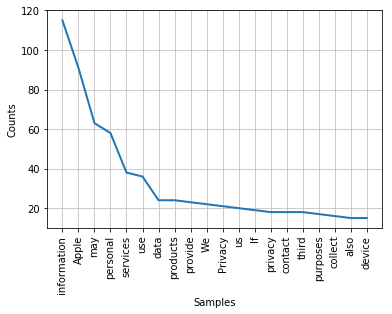

In [45]:
freq = nltk.FreqDist(words_clean)
for key,val in freq.items():
    print(str(key) + ':' + str(val))
    
freq.plot(20, cumulative=False)